# Load data into Spark DataFrame

In [2]:
from pyspark import SparkContext

In [3]:
import pyspark.sql.functions as F
import pandas as pd

In [4]:
# We use matplotlib for plotting
import matplotlib.pyplot as plt

# This statement allow to display plot without asking to
%matplotlib inline

%matplotlib inline is not supported in Databricks.
You can display matplotlib figures using display(). For an example, see https://docs.databricks.com/user-guide/visualizations/matplotlib-and-ggplot.html

In [5]:
event_table = spark.table('event_table')

In [6]:
event_table.show()

+---------+----------+--------+-----+
 uid| date| song_id|event|
+---------+----------+--------+-----+
168666043|2017-03-30| 5068607| P|
168646665|2017-03-30|18373139| P|
168648292|2017-03-30| 104028| P|
168574445|2017-03-30| 1026783| P|
168666387|2017-03-30| 6402913| P|
168636936|2017-03-30|20865252| P|
168666043|2017-03-30| 359910| P|
168617835|2017-03-30| 929972| P|
168579809|2017-03-30| 9820714| P|
168659242|2017-03-30|13360780| P|
168662873|2017-03-30| 367995| P|
168630322|2017-03-30| 7047038| P|
168666043|2017-03-30| 112846| P|
168663665|2017-03-30| 7187928| P|
168548197|2017-03-30| 9929880| P|
168654698|2017-03-30| 7118137| P|
168548197|2017-03-30| 9919225| P|
168667879|2017-03-30| 1238464| P|
168655554|2017-03-30| 4990278| P|
168548197|2017-03-30| 9919225| P|
+---------+----------+--------+-----+
only showing top 20 rows

In [7]:
# create new or overwrite original field with withColumn
event_table = event_table.withColumn('date',F.col('date').cast('string'))
#change date type to string type as an example

In [8]:
event_table.printSchema()

root
-- uid: string (nullable = true)
-- date: string (nullable = true)
-- song_id: string (nullable = true)
-- event: string (nullable = true)

In [9]:
event_table = event_table.withColumn('date',F.col('date').cast('date'))

In [10]:
event_table.printSchema()

root
-- uid: string (nullable = true)
-- date: date (nullable = true)
-- song_id: string (nullable = true)
-- event: string (nullable = true)

In [11]:
event_table.show()

+---------+----------+--------+-----+
 uid| date| song_id|event|
+---------+----------+--------+-----+
168666043|2017-03-30| 5068607| P|
168646665|2017-03-30|18373139| P|
168648292|2017-03-30| 104028| P|
168574445|2017-03-30| 1026783| P|
168666387|2017-03-30| 6402913| P|
168636936|2017-03-30|20865252| P|
168666043|2017-03-30| 359910| P|
168617835|2017-03-30| 929972| P|
168579809|2017-03-30| 9820714| P|
168659242|2017-03-30|13360780| P|
168662873|2017-03-30| 367995| P|
168630322|2017-03-30| 7047038| P|
168666043|2017-03-30| 112846| P|
168663665|2017-03-30| 7187928| P|
168548197|2017-03-30| 9929880| P|
168654698|2017-03-30| 7118137| P|
168548197|2017-03-30| 9919225| P|
168667879|2017-03-30| 1238464| P|
168655554|2017-03-30| 4990278| P|
168548197|2017-03-30| 9919225| P|
+---------+----------+--------+-----+
only showing top 20 rows

In [12]:
event_table[event_table['event']=='S'].show()

+---------+----------+-------+-----+
 uid| date|song_id|event|
+---------+----------+-------+-----+
168830619|2017-04-12| | S|
168583621|2017-04-12| | S|
168959645|2017-04-12| | S|
 82677429|2017-04-12| | S|
169003765|2017-04-12| | S|
168716413|2017-04-12| | S|
168945709|2017-04-12| | S|
168945709|2017-04-12| | S|
168685724|2017-04-12| | S|
168716413|2017-04-12| | S|
168657081|2017-04-12| | S|
168793105|2017-04-12| | S|
168793105|2017-04-12| | S|
168829513|2017-04-12| | S|
168829513|2017-04-12| | S|
168752874|2017-04-12| | S|
168765868|2017-04-12| | S|
168793105|2017-04-12| | S|
168973409|2017-04-12| | S|
168713074|2017-04-12| | S|
+---------+----------+-------+-----+
only showing top 20 rows

# Some exploration

In [14]:
# simple count rows
event_table.count()

Out[ 13 ]: 123218315

In [15]:
# select operation, count distinct rows
event_table.select('uid').distinct().count()

Out[ 14 ]: 677937

In [16]:
# group by aggregation
event_table.groupBy('event').count().show()

+-----+---------+
event| count|
+-----+---------+
 D| 6308786|
 S| 7787749|
 P|109121780|
+-----+---------+

In [17]:
# group by aggregation, more general (count, min, max, mean), multiple at once
event_table\
.groupBy('event').agg(
    F.count(F.col('uid')).alias('count'),
    F.min(F.col('uid')).alias('min_uid')
).show()

+-----+---------+--------------------+
event| count| max_uid|
+-----+---------+--------------------+
 D| 6308786| 0 |
 S| 7787749| 0 |
 P|109121780|!���=]91=���1...|
+-----+---------+--------------------+

In [18]:
# filter operation
# group by aggregation
# order by operation
event_table.filter((F.col('date')>='2017-04-01') & (F.col('date')<='2017-04-05')) \
                    .groupBy('date','event').count() \
                    .orderBy('date','event').show()

+----------+-----+-------+
 date|event| count|
+----------+-----+-------+
2017-04-01| D| 313896|
2017-04-01| P|4861515|
2017-04-01| S| 329484|
2017-04-02| D| 259085|
2017-04-02| P|4412737|
2017-04-02| S| 302192|
2017-04-03| D| 209739|
2017-04-03| P|2514190|
2017-04-03| S| 262351|
2017-04-04| D| 208337|
2017-04-04| P|3764112|
2017-04-04| S| 248342|
2017-04-05| D| 163576|
2017-04-05| P|3075354|
2017-04-05| S| 201878|
+----------+-----+-------+

In [19]:
date_count = event_table.groupBy('date').count().toPandas()

In [20]:
date_count=date_count.sort_values(by=['date'])

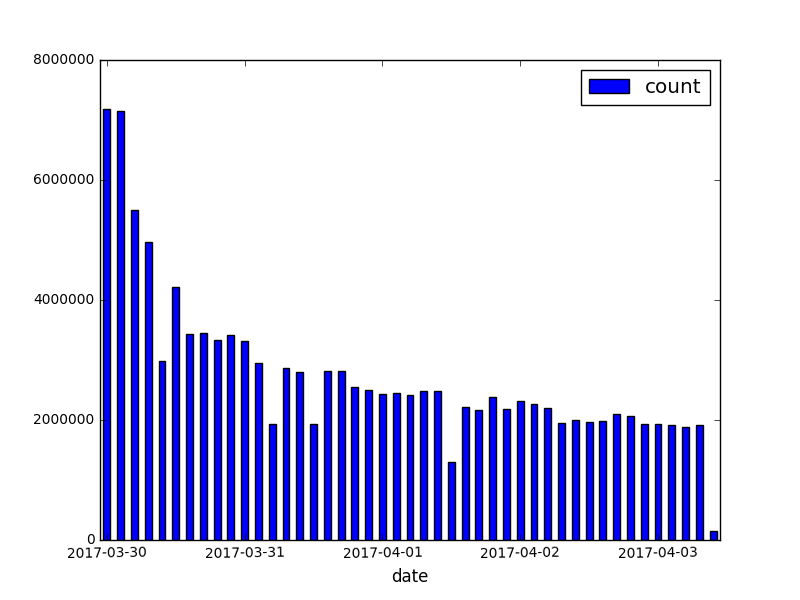

In [21]:
plt.figure()
date_count.plot.bar(x=date_count['date'],rot=1,fontsize=10)
plt.xticks(range(0,len(date_count))[::10])
plt.yticks(range(0,10000000)[::2000000])
display()

# Label definition

In [23]:
import datetime
from dateutil import parser

label_window_size = 14
label_window_end_date = parser.parse('2017-05-12').date()
label_window_start_date = label_window_end_date - datetime.timedelta(label_window_size - 1)
print('label window:',label_window_start_date,'~',label_window_end_date,'days:',label_window_size)

#https://docs.python.org/3/library/datetime.html

feature_window_size = 30
feature_window_end_date = label_window_start_date - datetime.timedelta(1)
feature_window_start_date = feature_window_end_date  - datetime.timedelta(feature_window_size - 1)
print('feature window:',feature_window_start_date,'~',feature_window_end_date,'days:',feature_window_size)

label window: 2017-04-29 ~ 2017-05-12 days: 14
feature window: 2017-03-30 ~ 2017-04-28 days: 30

In [24]:
feature_window_end_date

Out[ 6 ]: datetime.date(2017, 4, 28)

In [25]:
# all the uid we will model
df_model_uid = event_table.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))\
                    .select('uid').distinct()
# active in label window (active label=0)
df_active_uid_in_label_window = event_table.filter((F.col('date')>=label_window_start_date) & (F.col('date')<=label_window_end_date))\
                            .select('uid').distinct().withColumn('label',F.lit(0))

In [26]:
df_active_uid_in_label_window.show()

+---------+-----+
 uid|label|
+---------+-----+
168985497| 0|
168662163| 0|
168877203| 0|
169034989| 0|
168919387| 0|
168819045| 0|
168885888| 0|
168889395| 0|
168896704| 0|
168967633| 0|
168989668| 0|
168911490| 0|
169002582| 0|
168876537| 0|
168938019| 0|
168740508| 0|
168610105| 0|
168955383| 0|
168878728| 0|
168649240| 0|
+---------+-----+
only showing top 20 rows

In [27]:
# prepare label data (churn label=1; active label=0)
df_label = df_model_uid.join(df_active_uid_in_label_window,on=['uid'],how='left')
df_label = df_label.fillna(1)

In [28]:
df_label.groupBy('label').count().show()

+-----+------+
label| count|
+-----+------+
 1|444553|
 0|219338|
+-----+------+

# Feature generation

In [30]:
# event_data in feature_window
df_feature_window = event_table.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))

In [31]:
df_feature_window.groupBy('event').count().show()

+-----+--------+
event| count|
+-----+--------+
 D| 5359147|
 S| 6205258|
 P|83079260|
+-----+--------+

In [32]:
df_feature_window.write.saveAsTable('df_feature_window')
df_label.write.saveAsTable('df_label')

In [33]:
df_feature_window=spark.table('df_feature_window')
df_label=spark.table('df_label')

### Frequency features

##### method 1

In [36]:
# define a function to generate frequency features
def frequency_feature_generation(df,event,time_window,snapshot_date):
    """
    generate frequency features for one event type and one time window
    """
    df_feature = df.filter(F.col('event')==event)\
            .filter((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date))\
            .groupBy('uid').agg(F.count(F.col('uid')).alias('freq_'+event+'_last_'+str(time_window)))
    return df_feature

In [37]:
# generate one feature
event = 'S'
time_window = 3
snapshot_date = feature_window_end_date
df_feature = frequency_feature_generation(df_feature_window,event,time_window,snapshot_date)

In [38]:
df_feature.show(5)

+---------+-------------+
 uid|freq_S_last_3|
+---------+-------------+
167950530| 7|
167756744| 2|
167777847| 5|
167794834| 9|
167862193| 48|
+---------+-------------+
only showing top 5 rows

In [39]:
# generate frequency features for all event_list, time_window_list
event_list = ['P','D','S']
time_window_list = [1,3,7,14,30]
df_feature_list = []
for event in event_list:
    for time_window in time_window_list:
        df_feature_list.append(frequency_feature_generation(df_feature_window,event,time_window,snapshot_date))


In [40]:
df_feature_list

Out[ 13 ]: 
[DataFrame[uid: string, freq_P_last_1: bigint],
 DataFrame[uid: string, freq_P_last_3: bigint],
 DataFrame[uid: string, freq_P_last_7: bigint],
 DataFrame[uid: string, freq_P_last_14: bigint],
 DataFrame[uid: string, freq_P_last_30: bigint],
 DataFrame[uid: string, freq_D_last_1: bigint],
 DataFrame[uid: string, freq_D_last_3: bigint],
 DataFrame[uid: string, freq_D_last_7: bigint],
 DataFrame[uid: string, freq_D_last_14: bigint],
 DataFrame[uid: string, freq_D_last_30: bigint],
 DataFrame[uid: string, freq_S_last_1: bigint],
 DataFrame[uid: string, freq_S_last_3: bigint],
 DataFrame[uid: string, freq_S_last_7: bigint],
 DataFrame[uid: string, freq_S_last_14: bigint],
 DataFrame[uid: string, freq_S_last_30: bigint]]

##### method 2: too many dfs to join? do it another way

In [42]:
# define a function to generate frequency features for a list of time windows
# using when().otherwise(), and list comprehension trick!
def frequency_feature_generation_time_windows(df,event,time_window_list,snapshot_date):
    """
    generate frequency features for one event type and a list of time windows
    """
    df_feature = df \
        .filter(F.col('event')==event) \
        .groupBy('uid') \
        .agg(*[F.sum(F.when((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date),1).otherwise(0)).alias('freq_'+event+'_last_'+str(time_window)) \
                for time_window in time_window_list]
            )# *[] opens list and make them comma separated
    return df_feature

In [43]:
# generate one event type, all time windows 
event = 'S'
time_window_list = [1,3,7,14,30]
snapshot_date = feature_window_end_date
df_feature = frequency_feature_generation_time_windows(df_feature_window,event,time_window_list,snapshot_date)
df_feature.show(5)

+---------+-------------+-------------+-------------+--------------+--------------+
 uid|freq_S_last_1|freq_S_last_3|freq_S_last_7|freq_S_last_14|freq_S_last_30|
+---------+-------------+-------------+-------------+--------------+--------------+
169042781| 0| 1| 8| 21| 86|
168780880| 0| 0| 0| 4| 17|
168712566| 0| 0| 0| 1| 7|
168822504| 7| 7| 9| 13| 35|
 34166008| 0| 0| 18| 36| 60|
+---------+-------------+-------------+-------------+--------------+--------------+
only showing top 5 rows

In [44]:
# generate frequency features for all event_list, time_window_list
event_list = ['P','D','S']
time_window_list = [1,3,7,14,30]
df_feature_list_2 = []
for event in event_list:
    df_feature_list_2.append(frequency_feature_generation_time_windows(df_feature_window,event,time_window_list,snapshot_date))


In [45]:
df_feature_list_2

Out[ 19 ]: 
[DataFrame[uid: string, freq_P_last_1: bigint, freq_P_last_3: bigint, freq_P_last_7: bigint, freq_P_last_14: bigint, freq_P_last_30: bigint],
 DataFrame[uid: string, freq_D_last_1: bigint, freq_D_last_3: bigint, freq_D_last_7: bigint, freq_D_last_14: bigint, freq_D_last_30: bigint],
 DataFrame[uid: string, freq_S_last_1: bigint, freq_S_last_3: bigint, freq_S_last_7: bigint, freq_S_last_14: bigint, freq_S_last_30: bigint]]

### Recency features

In [47]:
# defined as days from last event
# can generate one feature for each type of event
def recency_feature_generation(df,event,snapshot_date):
    """
    generate recency features for one event type
    """
    df_recency = df.filter(F.col('event')==event)\
            .filter((F.col('date')<=snapshot_date))\
            .groupBy('uid').agg(F.min(F.datediff(F.lit(snapshot_date),F.col('date'))).alias('days_from_last_'+event))
    return df_recency

In [48]:
# generate frequency features for all event_list, time_window_list
event_list = ['P','D','S']
snapshot_date = feature_window_end_date
df_recency = []
for event in event_list:
  df_recency.append(recency_feature_generation(df_feature_window,event,snapshot_date))


In [49]:
df_recency

Out[ 16 ]: 
[DataFrame[uid: string, days_from_last_P: int],
 DataFrame[uid: string, days_from_last_D: int],
 DataFrame[uid: string, days_from_last_S: int]]

In [50]:
df_recency[0].groupBy('days_from_last_P').count().orderBy('days_from_last_P').show()

+----------------+-----+
days_from_last_P|count|
+----------------+-----+
 0|81606|
 1|33957|
 2|23168|
 3|18137|
 4| 9294|
 5|17743|
 6|14482|
 7|11956|
 8|10418|
 9|10278|
 10| 9205|
 11|10569|
 12|10574|
 13| 9646|
 14| 7118|
 15| 9355|
 16| 8315|
 17| 5077|
 18| 9053|
 19|10033|
+----------------+-----+
only showing top 20 rows

In [51]:
display(df_recency[0].groupBy('days_from_last_P').count().orderBy('days_from_last_P'))

days_from_last_P,count
0,81606
1,33957
2,23168
3,18137
4,9294
5,17743
6,14482
7,11956
8,10418
9,10278


### Profile features

In [53]:
df_play=spark.table('all_play_1_bot_removed')
df_play.show(5)

+---------+------+--------+----------+---------+-----------+
 uid|device| song_id| date|play_time|song_length|
+---------+------+--------+----------+---------+-----------+
168666043| ar| 5068607|2017-03-30| 0| 0|
168646665| ip|18373139|2017-03-30| 121| 121|
168648292| ip| 104028|2017-03-30| 0| 230|
168574445| ar| 1026783|2017-03-30| 230| 230|
168666387| ip| 6402913|2017-03-30| 1| 185|
+---------+------+--------+----------+---------+-----------+
only showing top 5 rows

In [54]:
df_play_feature_window = df_play.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))
df_profile_tmp = df_play_feature_window.select('uid','device').distinct()

In [55]:
df_profile_tmp.groupBy('device').count().show()

+------+------+
device| count|
+------+------+
 mc| 9|
 ar|506724|
 wp| 4|
 ip| 73095|
+------+------+

In [56]:
# check if one user has two devices
df_profile_tmp.count()

Out[ 105 ]: 579832

In [57]:
df_profile_tmp.distinct().count()

Out[ 106 ]: 579832

In [58]:
df_profile_tmp = df_profile_tmp.withColumn('device_type',F.when(F.col('device')=='ip',1).otherwise(2))
df_profile_tmp.groupBy('device_type').count().show()

+-----------+------+
device_type| count|
+-----------+------+
 1| 73095|
 2|506737|
+-----------+------+

In [59]:
df_profile = df_label.select('uid').join(df_profile_tmp.select('uid','device_type'),on='uid',how='left')
df_profile.groupBy('device_type').count().show()

+-----------+------+
device_type| count|
+-----------+------+
 null| 84198|
 1| 73095|
 2|506737|
+-----------+------+

In [60]:
df_label.show()

+----------+-----+
 uid|label|
+----------+-----+
 104777734| 1|
 107308817| 1|
 11596711| 0|
 117677098| 0|
 118301183| 1|
 120180992| 1|
 126941437| 0|
 128106175| 1|
 128119706| 0|
 129766230| 0|
 132952490| 0|
 133747174| 0|
134290296 | 1|
 136858556| 1|
 141858867| 1|
 146152408| 1|
146668507 | 1|
147195322 | 1|
 148413435| 0|
 149292492| 1|
+----------+-----+
only showing top 20 rows

### Total play time features

In [62]:
# Can you generate total song play time features (using play_ds data) for different time window
# using play data (need to clean play time first, play time may be negative in data
#The play time is in seconds.
from pyspark.sql.types import IntegerType
df_play_feature_window = df_play.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))
df_total_pt=[]
time_window_list = [1,3,7,14,30]
for t in time_window_list:
  df_total_pt_tmp=df_play_feature_window.select('uid','play_time')\
  .filter((F.col('play_time').cast(IntegerType())>=0)\
          &(F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date))\
  .groupBy('uid')\
  .agg(F.sum(F.col('play_time').cast(IntegerType())).alias('play_time_last_'+str(t)))
  df_total_pt.append(df_total_pt_tmp)

In [63]:
df_total_pt[0].show()

+---------+----------------+
 uid|play_time_last_1|
+---------+----------------+
168280699| 145286|
168168435| 159651|
168469279| 80155|
168616116| 124213|
168149184| 10248|
168131867| 16559|
168190887| 44148|
168482303| 142953|
168075529| 63068|
168306919| 23015|
168244750| 14709|
168072095| 8323|
168409004| 60045|
168373445| 18622|
168131025| 62539|
168234067| 53343|
168452762| 143882|
168481150| 59932|
168276725| 28677|
168161967| 31815|
+---------+----------------+
only showing top 20 rows

### Fancier frequency features

In [65]:
# Can you generate counts of songs play 80% of their song length (using play_ds data) for different time window
# using play data (need to clean play time and song length first, play time may be negative in data, song length may be zeros)
#The play time is in seconds.
from pyspark.sql.types import IntegerType
df_play_feature_window = df_play.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))
df_80percent_finished_song_count=[]
time_window_list = [1,3,7,14,30]
for t in time_window_list:
  df_80percent_finished_song_count_tmp=df_play_feature_window.select('uid','play_time','song_length')\
  .filter((F.col('play_time').cast(IntegerType())>=0)&(F.col('song_length').cast(IntegerType())>0)&\
          ((F.col('play_time').cast(IntegerType()))/(F.col('song_length').cast(IntegerType()))>=0.8)&\
          (F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date))\
  .groupBy('uid')\
  .agg(F.count(F.col('uid')).alias('80percent_finished_song_count_last_'+str(t)))
  df_80percent_finished_song_count.append(df_80percent_finished_song_count_tmp)

In [66]:
df_80percent_finished_song_count

Out[ 26 ]: 
[DataFrame[uid: string, 80percent_finished_song_count_last_1: bigint],
 DataFrame[uid: string, 80percent_finished_song_count_last_3: bigint],
 DataFrame[uid: string, 80percent_finished_song_count_last_7: bigint],
 DataFrame[uid: string, 80percent_finished_song_count_last_14: bigint],
 DataFrame[uid: string, 80percent_finished_song_count_last_30: bigint]]

In [67]:
df_80percent_finished_song_count[0].show()

+---------+------------------------------------+
 uid|80percent_finished_song_count_last_1|
+---------+------------------------------------+
168036229| 363|
167978234| 80|
167712206| 256|
167847489| 250|
167786639| 215|
168186531| 42|
167761424| 527|
167899727| 52|
167885515| 53|
167870959| 2210|
167872791| 311|
167935507| 989|
167874925| 176|
167794834| 738|
167626114| 208|
 57077508| 1701|
167575253| 723|
167633692| 36|
167802959| 6|
167919229| 29|
+---------+------------------------------------+
only showing top 20 rows

# Form training data

In [69]:
def join_feature_data(df_master,df_feature_list):
    for df_feature in df_feature_list:
        df_master = df_master.join(df_feature,on='uid',how='left')
        #df_master.persist() # uncomment if number of joins is too many
    return df_master
    

In [70]:
# join all behavior features
df_model_final = join_feature_data(df_label,df_feature_list)

In [71]:
#join all recency features
df_model_final = join_feature_data(df_model_final,df_recency)

In [72]:
# join all profile features
df_model_final = join_feature_data(df_model_final,[df_profile])

In [73]:
#join all total play time features
df_model_final = join_feature_data(df_model_final,df_total_pt)

In [74]:
#join the fancy frequency features
df_model_final = join_feature_data(df_model_final,df_80percent_finished_song_count)

In [75]:
df_model_final.show(5)

+---------+-----+-------------+-------------+-------------+--------------+--------------+-------------+-------------+-------------+--------------+--------------+-------------+-------------+-------------+--------------+--------------+----------------+----------------+----------------+-----------+----------------+----------------+----------------+-----------------+-----------------+------------------------------------+------------------------------------+------------------------------------+-------------------------------------+-------------------------------------+
 uid|label|freq_P_last_1|freq_P_last_3|freq_P_last_7|freq_P_last_14|freq_P_last_30|freq_D_last_1|freq_D_last_3|freq_D_last_7|freq_D_last_14|freq_D_last_30|freq_S_last_1|freq_S_last_3|freq_S_last_7|freq_S_last_14|freq_S_last_30|days_from_last_P|days_from_last_D|days_from_last_S|device_type|play_time_last_1|play_time_last_3|play_time_last_7|play_time_last_14|play_time_last_30|80percent_finished_song_count_last_1|80percent_finished_song_count_last_3|80percent_finished_song_count_last_7|80percent_finished_song_count_last_14|80percent_finished_song_count_last_30|
+---------+-----+-------------+-------------+-------------+--------------+--------------+-------------+-------------+-------------+--------------+--------------+-------------+-------------+-------------+--------------+--------------+----------------+----------------+----------------+-----------+----------------+----------------+----------------+-----------------+-----------------+------------------------------------+------------------------------------+------------------------------------+-------------------------------------+-------------------------------------+
104777734| 1| null| null| null| null| 3| null| null| null| null| null| null| null| null| null| null| 28| null| null| 2| 37| 37| 37| 37| 37| null| null| null| null| null|
107308817| 1| null| null| null| null| 2| null| null| null| null| null| null| null| null| null| null| 26| null| null| 2| 60938| 60938| 60938| 60938| 60938| null| null| null| null| null|
 11596711| 0| 13| 28| 47| 82| 129| null| null| null| null| null| null| 2| 3| 11| 21| 0| null| 1| 2| 11476| 11476| 11476| 11476| 11476| 44| 44| 44| 44| 44|
117677098| 0| null| 23| 37| 109| 274| null| 5| 6| 15| 22| null| 4| 8| 16| 47| 1| 1| 1| 2| 38710| 38710| 38710| 38710| 38710| 140| 140| 140| 140| 140|
118301183| 1| null| null| null| null| 10| null| null| null| null| null| null| null| null| null| null| 27| null| null| 2| 611| 611| 611| 611| 611| 2| 2| 2| 2| 2|
+---------+-----+-------------+-------------+-------------+--------------+--------------+-------------+-------------+-------------+--------------+--------------+-------------+-------------+-------------+--------------+--------------+----------------+----------------+----------------+-----------+----------------+----------------+----------------+-----------------+-----------------+------------------------------------+------------------------------------+------------------------------------+-------------------------------------+-------------------------------------+
only showing top 5 rows

In [76]:
df_model_final.printSchema()

root
-- uid: string (nullable = true)
-- label: integer (nullable = true)
-- freq_P_last_1: long (nullable = true)
-- freq_P_last_3: long (nullable = true)
-- freq_P_last_7: long (nullable = true)
-- freq_P_last_14: long (nullable = true)
-- freq_P_last_30: long (nullable = true)
-- freq_D_last_1: long (nullable = true)
-- freq_D_last_3: long (nullable = true)
-- freq_D_last_7: long (nullable = true)
-- freq_D_last_14: long (nullable = true)
-- freq_D_last_30: long (nullable = true)
-- freq_S_last_1: long (nullable = true)
-- freq_S_last_3: long (nullable = true)
-- freq_S_last_7: long (nullable = true)
-- freq_S_last_14: long (nullable = true)
-- freq_S_last_30: long (nullable = true)
-- days_from_last_P: integer (nullable = true)
-- days_from_last_D: integer (nullable = true)
-- days_from_last_S: integer (nullable = true)
-- device_type: integer (nullable = true)
-- play_time_last_1: long (nullable = true)
-- play_time_last_3: long (nullable = true)
-- play_time_last_7: long (nullable = true)
-- play_time_last_14: long (nullable = true)
-- play_time_last_30: long (nullable = true)
-- 80percent_finished_song_count_last_1: long (nullable = true)
-- 80percent_finished_song_count_last_3: long (nullable = true)
-- 80percent_finished_song_count_last_7: long (nullable = true)
-- 80percent_finished_song_count_last_14: long (nullable = true)
-- 80percent_finished_song_count_last_30: long (nullable = true)

In [77]:
df_model_final=df_model_final.fillna(0)

In [78]:
df_model_final.show(5)

+---------+-----+-------------+-------------+-------------+--------------+--------------+-------------+-------------+-------------+--------------+--------------+-------------+-------------+-------------+--------------+--------------+----------------+----------------+----------------+-----------+----------------+----------------+----------------+-----------------+-----------------+------------------------------------+------------------------------------+------------------------------------+-------------------------------------+-------------------------------------+
 uid|label|freq_P_last_1|freq_P_last_3|freq_P_last_7|freq_P_last_14|freq_P_last_30|freq_D_last_1|freq_D_last_3|freq_D_last_7|freq_D_last_14|freq_D_last_30|freq_S_last_1|freq_S_last_3|freq_S_last_7|freq_S_last_14|freq_S_last_30|days_from_last_P|days_from_last_D|days_from_last_S|device_type|play_time_last_1|play_time_last_3|play_time_last_7|play_time_last_14|play_time_last_30|80percent_finished_song_count_last_1|80percent_finished_song_count_last_3|80percent_finished_song_count_last_7|80percent_finished_song_count_last_14|80percent_finished_song_count_last_30|
+---------+-----+-------------+-------------+-------------+--------------+--------------+-------------+-------------+-------------+--------------+--------------+-------------+-------------+-------------+--------------+--------------+----------------+----------------+----------------+-----------+----------------+----------------+----------------+-----------------+-----------------+------------------------------------+------------------------------------+------------------------------------+-------------------------------------+-------------------------------------+
104777734| 1| 0| 0| 0| 0| 3| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 28| 0| 0| 2| 37| 37| 37| 37| 37| 0| 0| 0| 0| 0|
107308817| 1| 0| 0| 0| 0| 2| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 26| 0| 0| 2| 60938| 60938| 60938| 60938| 60938| 0| 0| 0| 0| 0|
 11596711| 0| 13| 28| 47| 82| 129| 0| 0| 0| 0| 0| 0| 2| 3| 11| 21| 0| 0| 1| 2| 11476| 11476| 11476| 11476| 11476| 44| 44| 44| 44| 44|
117677098| 0| 0| 23| 37| 109| 274| 0| 5| 6| 15| 22| 0| 4| 8| 16| 47| 1| 1| 1| 2| 38710| 38710| 38710| 38710| 38710| 140| 140| 140| 140| 140|
118301183| 1| 0| 0| 0| 0| 10| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 27| 0| 0| 2| 611| 611| 611| 611| 611| 2| 2| 2| 2| 2|
+---------+-----+-------------+-------------+-------------+--------------+--------------+-------------+-------------+-------------+--------------+--------------+-------------+-------------+-------------+--------------+--------------+----------------+----------------+----------------+-----------+----------------+----------------+----------------+-----------------+-----------------+------------------------------------+------------------------------------+------------------------------------+-------------------------------------+-------------------------------------+
only showing top 5 rows

In [79]:
df_model_final.write.saveAsTable('df_model_final_all')